In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [87]:
general = pd.read_csv(
    'data_samples/social/LT_emigration_general.csv',
    parse_dates=True,
    index_col='Metai'
)
avg_earning = pd.read_csv(
    'data_samples/social/LT_avg_earnings.csv',
    parse_dates=True,
    index_col='Period'
)

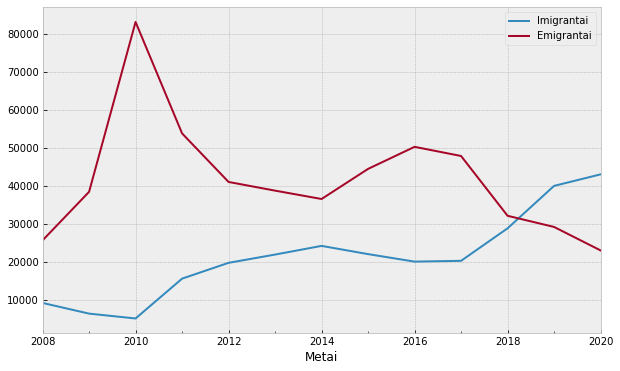

In [99]:
general.plot(figsize=(10,6))

In [95]:
avg_earning = avg_earning[::-1]

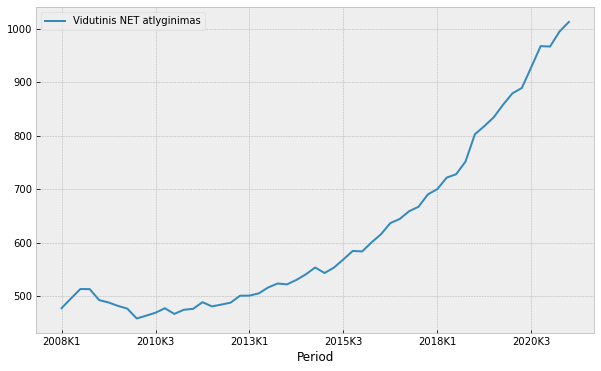

In [100]:
avg_earning.plot(figsize=(10,6))

In [70]:
def calc_change(df):
    change = df.copy
    change = (df/df.shift(1)) - 1
    change.iloc[0,:] = 0
    return change

In [101]:
stats = pd.read_csv(
    'data_samples/social/LT_EM_STATS.csv',
    parse_dates=True,
    index_col='Metai'
)

In [102]:
change = calc_change(stats)

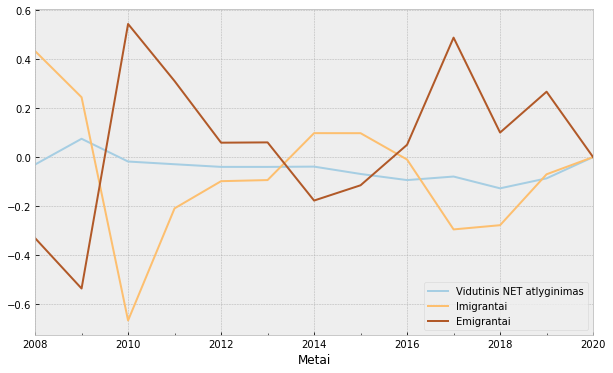

In [107]:
change.plot(figsize=(10,6), colormap='Paired');

In [108]:
print('\nKoreliacija','\n',change.corr(method='pearson'))


Koreliacija 
                            Vidutinis NET atlyginimas  Imigrantai  Emigrantai
Vidutinis NET atlyginimas                   1.000000    0.296406   -0.467951
Imigrantai                                  0.296406    1.000000   -0.887534
Emigrantai                                 -0.467951   -0.887534    1.000000



beta: 1.602523692536473

alpha: 0.005999670341379532


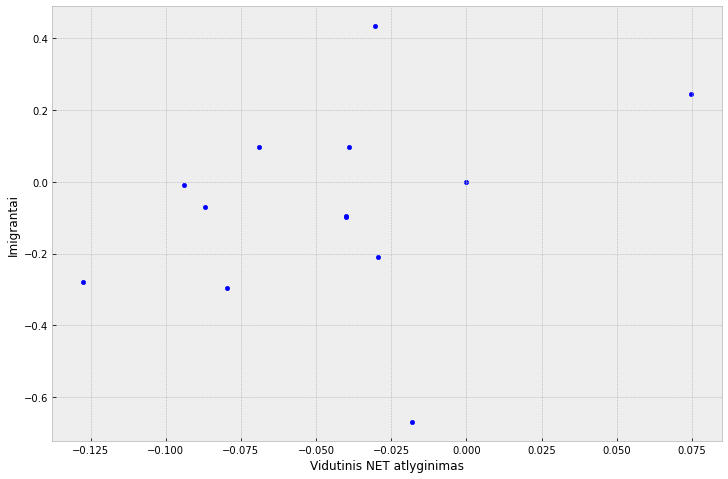

In [115]:
beta, alpha = np.polyfit(change['Vidutinis NET atlyginimas'], change['Imigrantai'],1)
change.plot(kind='scatter', x='Vidutinis NET atlyginimas', y='Imigrantai', figsize=(12,8))
print('\nbeta:', beta)
print('\nalpha:', alpha)


beta: -2.845916885906108

alpha: -0.07170569917749256


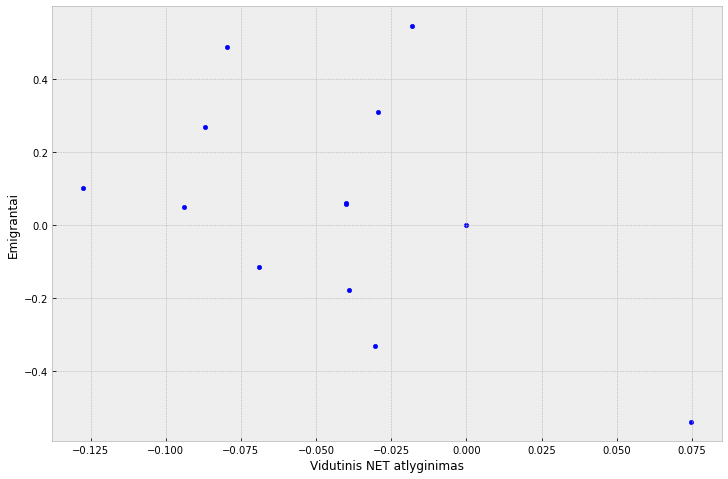

In [116]:
beta, alpha = np.polyfit(change['Vidutinis NET atlyginimas'], change['Emigrantai'],1)
change.plot(kind='scatter', x='Vidutinis NET atlyginimas', y='Emigrantai', figsize=(12,8))
print('\nbeta:', beta)
print('\nalpha:', alpha)

In [109]:
emig_age = pd.read_csv(
    'data_samples/social/LT_age_emigration.csv',
    parse_dates=True,
    index_col='Metai'
)

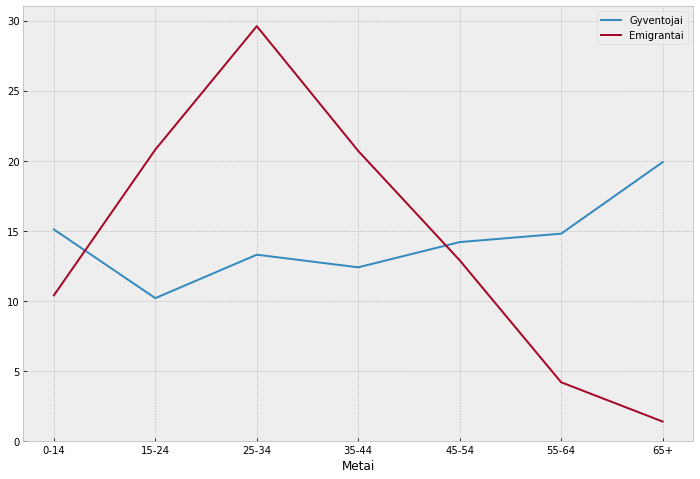

In [110]:
emig_age.plot(figsize=(12,8));